# Capstone Project - Sentiment Based Product Recommendation System

- Submitted by - Vaibhav Jain (csevaibhavjain@gmail.com)

## Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

### Build a sentiment-based product recommendation system, which includes the following tasks:

- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

## Loading the data

In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# Read csv file
df = pd.read_csv("/drive/My Drive/Colab Notebooks/SentimentBasedProductRecommendation/sample30.csv")
df.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


### Data Attributes

| Attribute            | Attribute Description                                                                                                                                                                                                 |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| id                   | Uniques identity number to identify each unique review given by the user to a particular product in the dataset                                                                                                       |
| brand                | Name of the brand of the product to which user has given review and rating                                                                                                                                            |
| categories           | Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more. |
| manufacturer         | Name of the manufacturer of the product                                                                                                                                                                               |
| name                 | Name of the product to which user has added review or rating                                                                                                                                                          |
| reviews_date         | Date on which the review has been added by the user                                                                                                                                                                   |
| reviews_didPurchase  | Whether a particular user has purchased the product or not                                                                                                                                                            |
| reviews_doRecommend  | Whether a particular user has recommended the product or not                                                                                                                                                          |
| reviews_rating       | Rating given by the user to a particular product                                                                                                                                                                      |
| reviews_text         | Review given by the user to a particular product                                                                                                                                                                      |
| reviews_title        | The title of the review given by the user to a particular product                                                                                                                                                     |
| reviews_userCity     | The residing city of the user                                                                                                                                                                                         |
| reviews_userProvince | The residing province of the user                                                                                                                                                                                     |
| reviews_username     | The unique identification for individual user in the dataset                                                                                                                                                          |
| user_sentiment       | The overall sentiment of the user for a particular product (Positive or Negative)                                                                                                                                     |

## Task 1: Data Cleaning and Pre-Processing

### Exploratory Data Analysis

In [ ]:
df.shape

(30000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
# Unique values
print("Unique Values Count:")
df.nunique().sort_values(ascending=False)

Unique Values Count:


reviews_text            27282
reviews_username        24914
reviews_title           18535
reviews_date             6857
reviews_userCity          977
id                        271
name                      271
categories                270
manufacturer              227
brand                     214
reviews_userProvince       42
reviews_rating              5
reviews_didPurchase         2
reviews_doRecommend         2
user_sentiment              2
dtype: int64

**Observations**
- Total 227 Manufacturers
- Total 214 Brands
- Total 271 Products (271 Product Ids, and their 271 product names)
- reviews_userProvince, reviews_rating, reviews_didPurchase, reviews_doRecommend, user_sentiment are categorical variables

In [ ]:
# Missing Values
print("Missing Values Count:")
print(df.isnull().sum().sort_values(ascending=False))

Missing Values Count:
reviews_userProvince    29830
reviews_userCity        28071
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_title             190
manufacturer              141
reviews_username           63
reviews_date               46
user_sentiment              1
id                          0
brand                       0
categories                  0
name                        0
reviews_rating              0
reviews_text                0
dtype: int64


In [ ]:
# Missing precentage
print("Missing Values Percentage:")
df_missing = df.isna().sum() / len(df) * 100
print(df_missing.sort_values(ascending=False))

Missing Values Percentage:
reviews_userProvince    99.433333
reviews_userCity        93.570000
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_title            0.633333
manufacturer             0.470000
reviews_username         0.210000
reviews_date             0.153333
user_sentiment           0.003333
id                       0.000000
brand                    0.000000
categories               0.000000
name                     0.000000
reviews_rating           0.000000
reviews_text             0.000000
dtype: float64


**Observations** 
- `reviews_userProvince`, and `reviews_userCity` columns should be dropped as more than 90% data is missing.
- `reviews_didPurchase` column has about 46% data missing, this field is not useful in building sentiment analysis or Recommendation system, and should be dropped as well.

**Analysis** 
- Lot of data is missing for columns, and these can be dropped
 - `reviews_userProvince` 
 - `reviews_userCity`
 - `reviews_didPurchase`
- Missing `reviews_title` can be filled in as `<blank>`
- Missing `manufacturer` can be filled in as `others`
- Missing `reviews_username` can be filled in as `others`
- Missing `user_sentiment` only 1 row can be filled in manually
- Missing `reviews_doRecommend` need further analysis
- Missing `reviews_date`, This column can be dropped as well, as this info is not much helpful for sentiment analysis and Product recommendation

In [ ]:
# Drop columns with huge missing data
df_clean = df.copy()

df_clean.drop(columns=['reviews_userProvince','reviews_userCity','reviews_didPurchase', 'reviews_date'], inplace=True)

In [ ]:
# Looking at 1 row where user_sentiment is missing
pd.set_option('display.max_colwidth', 300)
df[df.user_sentiment.isna()].reviews_text

28354    my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the poin...
Name: reviews_text, dtype: object

**Observation** - Reading above review manually, we can see that it is a positive review.

### Fill Missing Values

In [ ]:
# Fill missing values as per above EDA Analysis
df_clean['reviews_title'].fillna('', inplace=True)            # Update 190 rows
df_clean['manufacturer'].fillna('others', inplace=True)       # Update 141 rows
df_clean['reviews_username'].fillna('others', inplace=True)   # Update 63 rows
df_clean['user_sentiment'].fillna('Positive', inplace=True)   # Update 1 row

In [ ]:
# Missing precentage
print("Missing Values Percentage:")
df_missing = df_clean.isna().sum() / len(df) * 100
print(df_missing.sort_values(ascending=False))

Missing Values Percentage:
reviews_doRecommend    8.566667
id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.000000
name                   0.000000
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.000000
reviews_username       0.000000
user_sentiment         0.000000
dtype: float64


In [ ]:
df_clean['reviews_doRecommend'].value_counts(normalize=True)

True     0.943493
False    0.056507
Name: reviews_doRecommend, dtype: float64

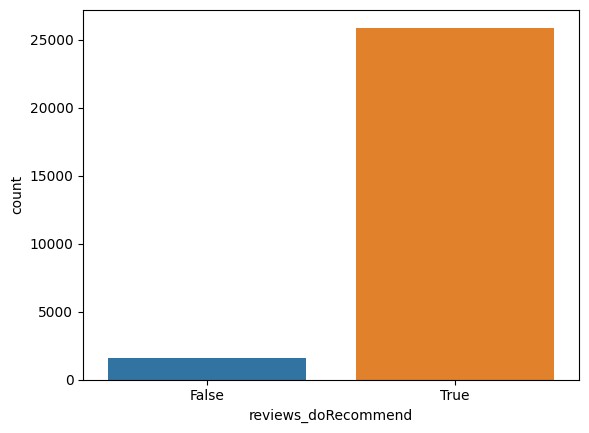

In [ ]:
sns.countplot(x = 'reviews_doRecommend', data = df_clean)
plt.show()

**Observations**
- `reviews_doRecommend` column has huge Class imbalance, about 95% values are True.
- This columns can be dropped, as this provides very little value to our problem statement.

In [ ]:
# Drop reviews_doRecommend with about 95% values True as per EDA analysis
df_clean.drop(columns=['reviews_doRecommend'], inplace=True)

In [ ]:
df_clean.shape

(30000, 10)

In [ ]:
# Missing Values
print("Missing Values Count:")
print(df_clean.isnull().sum().sort_values(ascending=False))

Missing Values Count:
id                  0
brand               0
categories          0
manufacturer        0
name                0
reviews_rating      0
reviews_text        0
reviews_title       0
reviews_username    0
user_sentiment      0
dtype: int64


**Data Cleaning is complete, We have clean data now with 30000 rows and 9 columns**

### Convert column data types

In [ ]:
df_clean['id'] = df_clean['id'].astype(str)
df_clean['brand'] = df_clean['brand'].astype(str)
df_clean['categories'] = df_clean['categories'].astype(str)
df_clean['manufacturer'] = df_clean['manufacturer'].astype(str)
df_clean['name'] = df_clean['name'].astype(str)
df_clean['reviews_text'] = df_clean['reviews_text'].astype(str)
df_clean['reviews_title'] = df_clean['reviews_title'].astype(str)
df_clean['reviews_username'] = df_clean['reviews_username'].astype(str)

In [ ]:
# Map category as int value - user_sentiment to 1 or 0
df_clean['user_sentiment'] = df_clean['user_sentiment'].map({'Positive':1,'Negative':0})

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   brand             30000 non-null  object
 2   categories        30000 non-null  object
 3   manufacturer      30000 non-null  object
 4   name              30000 non-null  object
 5   reviews_rating    30000 non-null  int64 
 6   reviews_text      30000 non-null  object
 7   reviews_title     30000 non-null  object
 8   reviews_username  30000 non-null  object
 9   user_sentiment    30000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.3+ MB


In [ ]:
df_clean['user_sentiment'].value_counts(normalize=True)

1    0.887767
0    0.112233
Name: user_sentiment, dtype: float64

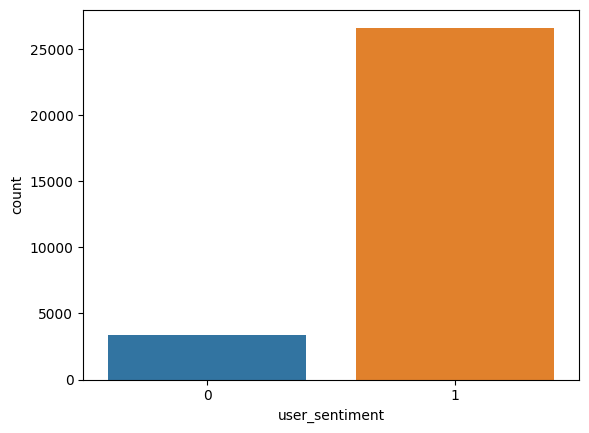

In [ ]:
sns.countplot(x = 'user_sentiment', data = df_clean)
plt.show()

**Observation**
- There is big class imbalance in `user_sentiment`. Majority of reviews are Positive. We will need to handle this during modelling

In [ ]:
df_clean['reviews_rating'].value_counts(normalize=True)

5    0.694367
4    0.200667
1    0.046133
3    0.044833
2    0.014000
Name: reviews_rating, dtype: float64

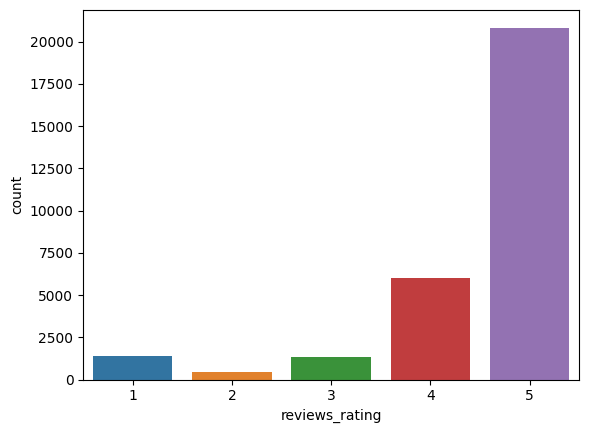

In [ ]:
sns.countplot(x = 'reviews_rating', data = df_clean)
plt.show()

**Observation**
- There is big class imbalance in `reviews_rating`. Majority of ratings are 4, 5. We will need to handle this during modelling

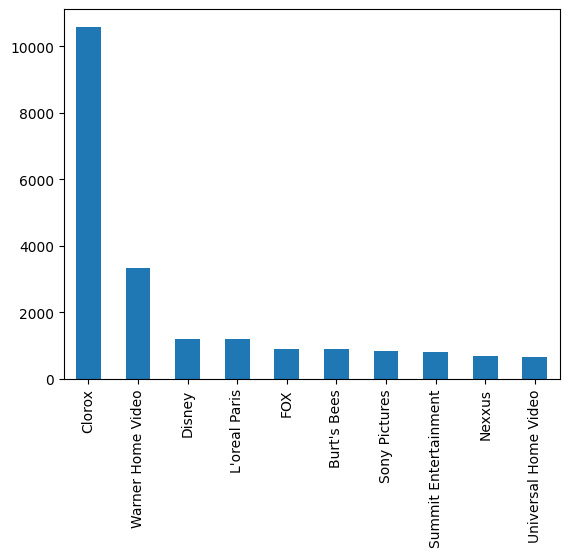

In [ ]:
# Look at most common brands
df_clean['brand'].value_counts()[:10].plot(kind='bar')
plt.show()

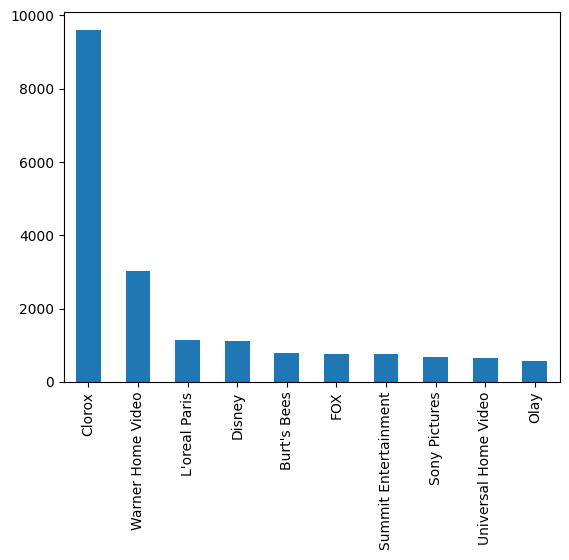

In [ ]:
# Look at top brands with positive reviews
df_clean[df_clean.user_sentiment == 1].brand.value_counts()[:10].plot(kind='bar')
plt.show()

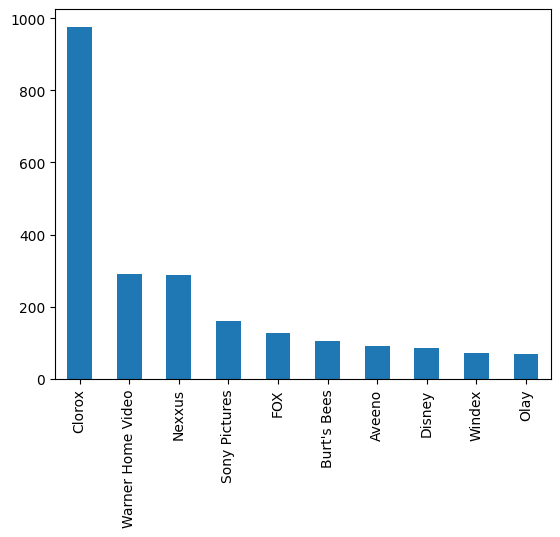

In [ ]:
# Look at top brands with negative reviews
df_clean[df_clean.user_sentiment == 0].brand.value_counts()[:10].plot(kind='bar')
plt.show()

## Task 2: Text Processing

For the purpose of sentiment analysis, it would be good to combine Review Title and Review Text into single column, We will have all info available in single column.

In [ ]:
df_prep = df_clean.copy()

In [ ]:
df_prep['reviews'] = df_prep['reviews_title'] + " " + df_prep['reviews_text']
df_prep.drop(columns=['reviews_title','reviews_text'], inplace=True)
df_prep.shape

(30000, 9)

In [ ]:
df_prep.head(3)

,id,brand,categories,manufacturer,name,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,1,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,Good Good flavor. This review was collected as part of a promotion.
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,Good Good flavor.


### Text Processing Steps
- Remove punctuation
- Lower case everything
- remove spaces
- Remove stopwords
- Lemmatization


In [ ]:
# Import Libraries
import re, nltk, spacy
import en_core_web_sm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{"mustn't", 'they', 'himself', 'further', 'nor', "it's", 'who', 'before', 'only', "you'll", 'by', 'her', "hasn't", 'own', 'each', 'through', 'ma', 'yourselves', 'ours', 'why', 'had', 'there', 'for', 'that', 'up', 'between', 'themselves', 'their', 'just', 'any', 't', 'all', "should've", 'with', "you'd", 'being', 'such', 'm', 'too', 'not', 'very', 'i', 'both', 'to', 'when', 'down', 'you', 'those', 'aren', "don't", 'hadn', 'about', 'is', "mightn't", 'theirs', 'was', 'couldn', 'herself', 'been', 'wouldn', 'd', 'off', 'she', 'doing', 'on', "shouldn't", 'having', 'above', 'him', 'a', 'whom', 'but', 'because', 'few', 'its', 'at', 'these', 'won', 'what', 'ourselves', 'he', 'if', 'so', 'should', 'needn', 'out', 'now', 'are', 'under', 'no', "couldn't", 'does', 'then', 'do', 'll', 'hasn', "haven't", 'yourself', 'more', "you're", 's', 'while', 'weren', 'below', 'myself', 'shan', 'your', 'didn', 'am', 've', 'y', "aren't", 'o', "shan't", "doesn't", 'isn', 'than', 'mustn', 'which', "isn't", 'again', 

In [ ]:
# Define Text Processing functions

def change_case(review):
  review = review.lower() # Convert to lowercase
  return review

def remove_spaces(review):
  review = review.strip() # Remove spaces
  return review

def remove_punctuation(review):
  pattern = '[^\w\s]'     # Removing punctuation
  review = re.sub(pattern, '', review)
  return review

def remove_stopwords(review):
  words = word_tokenize(review) # Split sentences into words
  review_nostopwords = " ".join([each_word for each_word in words if each_word not in stopwords_set])
  return review_nostopwords

def lemmatize(review):
  sentence = []
  doc = nlp(review)
  for word in doc:
    sentence.append(word.lemma_)
  return " ".join(sentence)

In [ ]:
# raw
df_prep['reviews'].head(2)

0    Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1                                                                                                                                                       Good Good flavor. This review was collected as part of a promotion.
Name: reviews, dtype: object

In [ ]:
# Change Case
df_prep['reviews'] = df_prep['reviews'].apply(change_case)
df_prep['reviews'].head(2)

0    just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1                                                                                                                                                       good good flavor. this review was collected as part of a promotion.
Name: reviews, dtype: object

In [ ]:
# Remove spaces
df_prep['reviews'] = df_prep['reviews'].apply(remove_spaces)
df_prep['reviews'].head(2)

0    just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1                                                                                                                                                       good good flavor. this review was collected as part of a promotion.
Name: reviews, dtype: object

In [ ]:
# Remove Punctuation
df_prep['reviews'] = df_prep['reviews'].apply(remove_punctuation)
df_prep['reviews'].head(2)

0    just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy
1                                                                                                                                                good good flavor this review was collected as part of a promotion
Name: reviews, dtype: object

In [ ]:
# Remove Stopwords
df_prep['reviews'] = df_prep['reviews'].apply(remove_stopwords)
df_prep['reviews'].head(2)

0    awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1                                                                         good good flavor review collected part promotion
Name: reviews, dtype: object

In [ ]:
# Lemmatize
df_prep['reviews'] = df_prep['reviews'].apply(lemmatize)
df_prep['reviews'].head(2)

0    awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1                                                                          good good flavor review collect part promotion
Name: reviews, dtype: object

**Text Pre Processing is complete, lets visualize some common words in reviews**

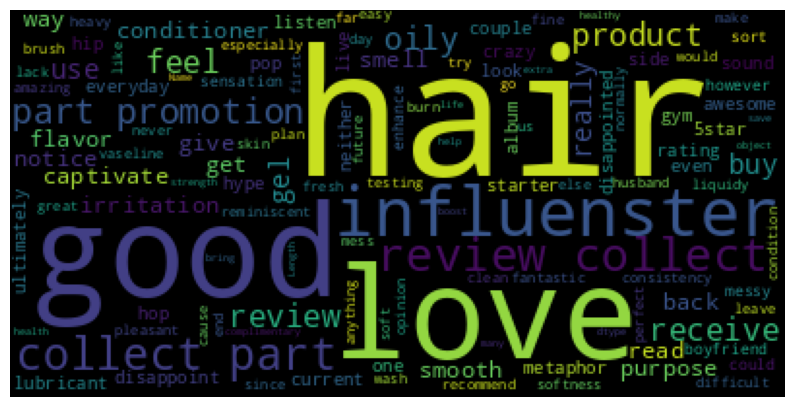

In [ ]:
# Using a word cloud find the top words by frequency among all the reviews
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stopwords_set, max_words=200).generate(str(df_prep.reviews))
print(wordcloud)

plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

## Task 3: Feature Extraction

- Feature extraction using TF-IDF
- Handle Class imbalance as identified in EDA
- Perform train, test split

In [ ]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

Using TF-IDF for Feature Extraction
- Ignore words appearing in more than 95% of reviews
- Ignore words that appear only less than 5 times in reviews

In [ ]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, stop_words='english', ngram_range=(1,2))

In [ ]:
X = tfidf.fit_transform(df_prep['reviews'])
y = df_prep['user_sentiment']

In [ ]:
print(tfidf.get_feature_names_out())

['10' '10 day' '10 min' ... 'zombie action' 'zombie movie' 'zone']


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.25)
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (22500, 16045) (22500,)
Test shapes: (7500, 16045) (7500,)


In [ ]:
# Handle user_sentiment class imbalance
df_prep['user_sentiment'].value_counts(normalize=True)

1    0.887767
0    0.112233
Name: user_sentiment, dtype: float64

In [ ]:
# 1 = Positive class makes 88% of data
# Use SMOTE method to generate random data so have both positive and negative classes have equal amount of data

counter = Counter(y_train)
print("Before handling imbalance:")
print(counter)
print(X_train.shape)
print(y_train.shape)

# Generate data using SMOTE
smote = SMOTE(random_state=31)
X_train_final, y_train_final = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_final)
print("After handling imbalance:")
print(counter)
print(X_train_final.shape)
print(y_train_final.shape)

Before handling imbalance:
Counter({1: 19969, 0: 2531})
(22500, 16045)
(22500,)
After handling imbalance:
Counter({1: 19969, 0: 19969})
(39938, 16045)
(39938,)


## Task 4: Model Building

Create below models, and analyze model performance:
- Logistic Regression
- Random Forest
- XG Boost

In [ ]:
# Import required libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Define model scoring functions

def display_score(model):
  metric = []

  y_pred = model.predict(X_test)

  conf_mat = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, 
                                display_labels=model.classes_)
  disp.plot()
  print(model)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1score = metrics.f1_score(y_test, y_pred)

  print('Accuracy is  :', show_percentage(accuracy))
  print('Precision is :', show_percentage(precision))
  print('Recall is    :', show_percentage(recall))
  print('F1 Score is  :', show_percentage(f1score))

  metric.append(show_percentage(accuracy))
  metric.append(show_percentage(precision))
  metric.append(show_percentage(recall))
  metric.append(show_percentage(f1score))

  return metric

def show_percentage(num):
  return f"{num * 100:.2f}%"

### Logistic Regression Model

In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression(random_state=31)

lr.fit(X_train_final, y_train_final)

LogisticRegression(random_state=31)

LogisticRegression(random_state=31)
Accuracy is  : 87.68%
Precision is : 96.47%
Recall is    : 89.41%
F1 Score is  : 92.80%


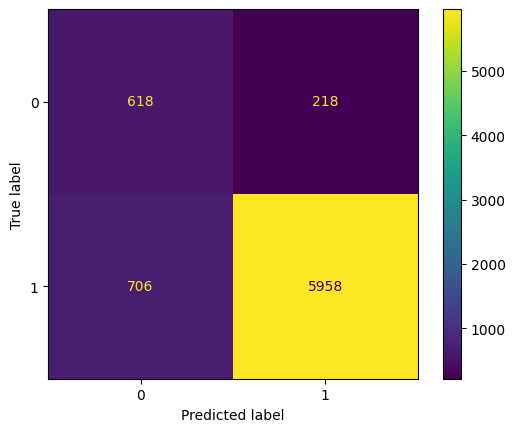

In [ ]:
metric_lr = display_score(lr)

#### Hyperparameter Tuning - Logistic Regression Model

In [ ]:
# Tuning above base model using Grid Search CV
lr_params = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01], "solver": ["liblinear"]}

grid_Search = GridSearchCV(lr,
                        param_grid = lr_params,
                        cv = 5,
                        verbose = True,
                        n_jobs = -1,
                        scoring = 'accuracy')

grid_Search.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=31), n_jobs=-1,
             param_grid={'C': [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=True)

In [ ]:
# View best model params
grid_Search.best_params_

{'C': 100, 'solver': 'liblinear'}

LogisticRegression(C=100, random_state=31, solver='liblinear')
Accuracy is  : 89.41%
Precision is : 94.28%
Recall is    : 93.77%
F1 Score is  : 94.03%


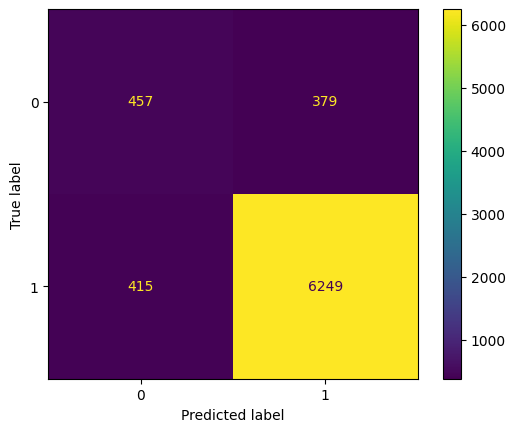

In [ ]:
lr_tuned = grid_Search.best_estimator_
metric_lr_tuned = display_score(lr_tuned)

### Random Forest Model

In [ ]:
# Import required libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=31)

rf.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=31)

RandomForestClassifier(random_state=31)
Accuracy is  : 90.29%
Precision is : 92.90%
Recall is    : 96.44%
F1 Score is  : 94.64%


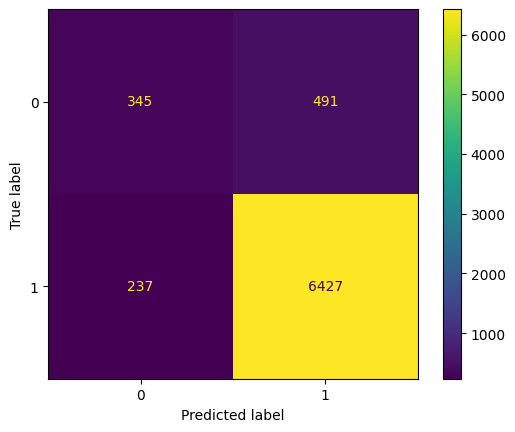

In [ ]:
metric_rf = display_score(rf)

#### Hyperparameter Tuning - Random Forest Model

In [ ]:
# Tuning above model using Random Search CV

rf_params = {"n_estimators": np.arange(10, 1000, 50),
             "max_depth": np.arange(10, 50, 5),
             "min_samples_split": np.arange(15, 500, 15),
             "min_samples_leaf": np.arange(5, 50, 5)}

random_search_rf = RandomizedSearchCV(rf,
                        param_distributions = rf_params,
                        cv = 5,
                        verbose = True,
                        n_jobs = -1,
                        scoring = 'accuracy')

random_search_rf.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=31),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45]),
                                        'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'min_samples_split': array([ 15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180, 195,
       210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390,
       405, 420, 435, 450, 465, 480, 495]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='accuracy', verbose=True)

In [ ]:
# View best model params
random_search_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 105,
 'min_samples_leaf': 5,
 'max_depth': 35}

RandomForestClassifier(max_depth=35, min_samples_leaf=5, min_samples_split=105,
                       n_estimators=160, random_state=31)
Accuracy is  : 85.65%
Precision is : 94.38%
Recall is    : 89.17%
F1 Score is  : 91.70%


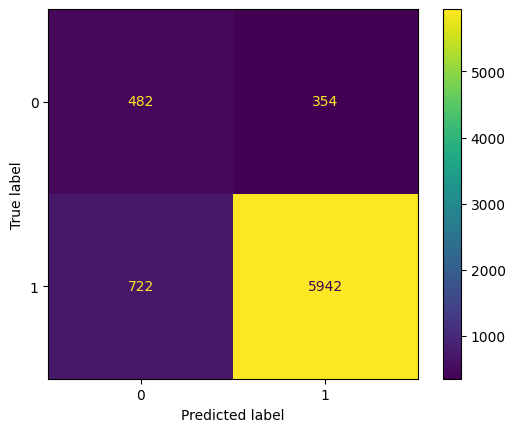

In [ ]:
rf_tuned = random_search_rf.best_estimator_
metric_rf_tuned = display_score(rf_tuned)

### XG Boost Model

In [ ]:
# Import required libraries
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xg = xgb.XGBClassifier(random_state=31)

xg.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=31, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=31, ...)
Accuracy is  : 88.29%
Precision is : 94.38%
Recall is    : 92.32%
F1 Score is  : 93.34%


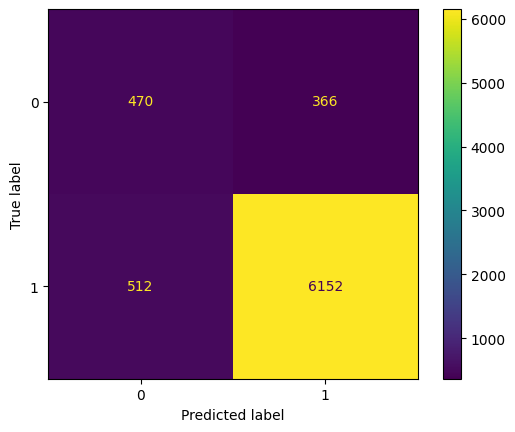

In [ ]:
metric_xg = display_score(xg)

#### Hyperparameter Tuning - XG Boost Model

In [ ]:
# Tuning above model using Random Search CV

xg_params = {"learning_rate": np.arange(0.05, 1, 0.1),
             "max_depth": np.arange(5, 20, 5)}

random_search_xg = RandomizedSearchCV(xg,
                        param_distributions = xg_params,
                        cv = 5,
                        verbose = True,
                        n_jobs = -1,
                        scoring = 'accuracy')

random_search_xg.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=31, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]),
                                        'max_depth': array([ 5, 10, 15])},
                   scoring='accuracy', verbose=True)

In [ ]:
# View best model params
random_search_xg.best_params_

{'max_depth': 15, 'learning_rate': 0.35000000000000003}

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.35000000000000003,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=31, ...)
Accuracy is  : 90.20%
Precision is : 94.16%
Recall is    : 94.85%
F1 Score is  : 94.51%


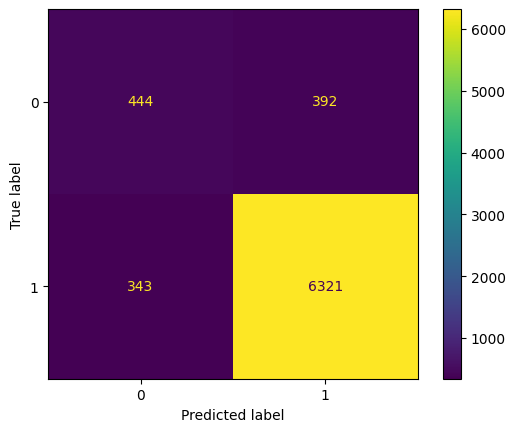

In [ ]:
xg_tuned = random_search_xg.best_estimator_
metric_xg_tuned = display_score(xg_tuned)

### Model Comparison

In [ ]:
score_table = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score']}
score_metric = pd.DataFrame(score_table)

lr_m = pd.Series(metric_lr, name = 'Logistic Regression')
lr_tuned_m = pd.Series(metric_lr_tuned, name = 'Logistic Regression Tuned')
rf_m = pd.Series(metric_rf, name = 'Random Forest')
rf_tuned_m = pd.Series(metric_rf_tuned, name = 'Random Forest Tuned')
xg_m = pd.Series(metric_xg, name = 'XG Boost')
xg_tuned_m = pd.Series(metric_xg_tuned, name = 'XG Boost Tuned')

score_metric = pd.concat([score_metric, lr_m, lr_tuned_m, rf_m, rf_tuned_m, xg_m, xg_tuned_m], axis = 1)

score_metric

,Metric,Logistic Regression,Logistic Regression Tuned,Random Forest,Random Forest Tuned,XG Boost,XG Boost Tuned
0,Accuracy,87.68%,89.41%,90.29%,85.65%,88.29%,90.20%
1,Precision,96.47%,94.28%,92.90%,94.38%,94.38%,94.16%
2,Recall,89.41%,93.77%,96.44%,89.17%,92.32%,94.85%
3,F1 Score,92.80%,94.03%,94.64%,91.70%,93.34%,94.51%


**Conclusion**

Looking at above Model comparison metrics. We can see 
- All 6 models are comparitively very close.
- XG Boost tuned model provides best Accuracy.
- Logistic Regression model provides best Precision.
- Random Forest model provides best Recall, XG Boost tuned is second best.
- Random Forest model provides best F1 Score, XG Boost is almost same.

Random forest tends to learn the data and thus shows great results here, 
so **choosing `XG Boost tuned` model as best model and moving ahead.**

In [ ]:
final_sentiment_model = xg_tuned

## Task 5: Building the Recommendation System

I will be building two types of recommendation systems:
- User-User based recommendataion system
- Item-Item based recommendation system

For this, We need to identify 

1. which users are similar
2. which items are similar

Similarity is identified using one of these 2 methods
 - *Cosine Similarity* - this is a measurement that quantifies the similarity between two vectors.
 - *Adjusted Cosine Similarity* - this is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.

In [ ]:
# Check final data frame which was prepared earlier
df_clean.head(2)

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,1


In [ ]:
# Select data required for recommendation system
df_rs = df_clean.copy()
df_rs.drop(columns=['brand','categories','manufacturer', 'reviews_text', 'reviews_title', 'user_sentiment'], inplace=True)
df_rs.head(2)

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w


In [ ]:
# import required libraries
from sklearn.model_selection import train_test_split

In [ ]:
# splitting data into train and test
train, test = train_test_split(df_rs, random_state=31, test_size=0.25)

print("Train Shape:", train.shape)
print("Test Shape :", test.shape)

Train Shape: (22500, 4)
Test Shape : (7500, 4)


In [ ]:
# Create dummy train and test
# Dummy datasets are used to store whether user has rated particular product or not.
# So that, only products that are not rated by the user will be recommended by the system.
# The products not rated by user is marked as 1, and 0 otherwise.

dummy_train = train.copy()
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_train.head(2)

,id,name,reviews_rating,reviews_username
27808,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),0,caringhusband
11678,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,0,tamz


In [ ]:
# Pivot the dummy train dataset into matrix format
dummy_train = pd.pivot_table(dummy_train, index='reviews_username', columns='id', values='reviews_rating').fillna(1)
dummy_train.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# import required libraries
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# define cosine calculation method using pairwise distances
def get_correlation_similarity_matrix(df_param):
  df_local = df_param.fillna(0)
  correlation = 1 - pairwise_distances(df_local, metric='cosine')
  correlation[np.isnan(correlation)] = 0
  print("Correlation:")
  print(correlation)
  print("Correlation Shape:", correlation.shape)
  return correlation

### User-User Based Recommendation System

In [ ]:
# Pivot the train dataset into matrix format in which 
# - columns are products (product id)
# - the rows are user names
# - values are actual ratings given by user to products
# - If user has not rated a product NAN is shown

df_pivot_user = pd.pivot_table(train, index='reviews_username', columns='id', values='reviews_rating')
df_pivot_user.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Find Cosine Similarity

In [ ]:
# Create User Similarity Matrix using Cosine Method
user_correlation_cosine = get_correlation_similarity_matrix(df_pivot_user)

Correlation:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Correlation Shape: (19424, 19424)


#### Find Adjusted Cosine Similarity

In [ ]:
# Create User Similarity Matrix using Adjusted Cosine Method

# 1. Normalize rating of the product for each user around mean
# This is to handle scenarios where each user has its own perception of rating e.g.
# One user can rate things as high rating generally where as other user can rate all things to low rating generally.
mean_user = np.nanmean(df_pivot_user, axis=1)
df_pivot_normalized_user = (df_pivot_user.T - mean_user).T

# 2. Create User Similarity Matrix using Adjusted Cosine Method
user_correlation_adjusted_cosine = get_correlation_similarity_matrix(df_pivot_normalized_user)

Correlation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Correlation Shape: (19424, 19424)


**We will be using Adjusted Cosine Correlation matrix moving forward**

In [ ]:
user_correlation = user_correlation_adjusted_cosine

#### Prediction - User-User based Recommendation System

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [ ]:
user_correlation[user_correlation<0]=0

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset). 

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot_user.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero**

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)
user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Export Final Ratings to CSV File
user_final_rating.to_csv('user_final_ratings.csv')

#### Recommend top 20 products for a user

In [ ]:
def recommend_top_20_user_user(user_name):
  if user_name not in user_final_rating.index:
    print("Invalid Input. Enter a valid review_username.")
    return "error"

  recommendations_user = user_final_rating.loc[user_name].sort_values(ascending=False)[0:20]
  df_recommendations_user = pd.DataFrame({'Product Id': recommendations_user.index, 'cosine_similarity_score' : recommendations_user})
  df_recommendations_user.reset_index(drop=True, inplace=True)

  df_merged_user = pd.merge(df_recommendations_user, df_clean, 
                      left_on='Product Id', right_on='id', 
                      how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
  df_merged_user.reset_index(drop=True, inplace=True)

  print("Recommendations user:")
  return df_merged_user.sort_values(by='cosine_similarity_score', ascending=False)

In [ ]:
# Take the user ID as input.
# use_name = input("Enter a review_username: ")
user_name = 'charlie'
print("UserName :", user_name)

result_user = recommend_top_20_user_user(user_name)
result_user

UserName : charlie
Recommendations user:


,Product Id,name,cosine_similarity_score
0,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),24.965047
1,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,13.982932
2,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,9.965757
3,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,9.305372
4,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,8.438068
5,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),7.739829
6,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),6.900116
7,AVpe31o71cnluZ0-YrSD,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),5.929220
8,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",5.364586
9,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",4.967036


#### Evaluation - User-User based Recommendation System

Evaluation will we same as seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [ ]:
# Define methods for Evaluation and RMSE Calculation

from sklearn.preprocessing import MinMaxScaler
from numpy import *

def evaluate_model(colName, transposeNeeded, corr, df_piv, df_piv_normalized):
  # Build a common dataset which stores comomon user names or common items from train and test datasets
  common = test[test[colName].isin(train[colName])]

  # Convert common dataset to a user-item matrix
  common_matrix = pd.pivot_table(common, index='reviews_username', columns='id', values='reviews_rating')

  # Transpose is needed for item-item system
  if(transposeNeeded):
    common_matrix = common_matrix.T

  # Convert correlation matrix to a dataframe
  corr_df = pd.DataFrame(corr)
  corr_df[colName] = df_piv_normalized.index
  corr_df.set_index(colName, inplace=True)

  # Build a correlation dataframe only with common user names/ common items
  list_name = common[colName].tolist()
  corr_df.columns = df_piv.index.tolist()
  corr_df_1 = corr_df[corr_df.index.isin(list_name)]
  corr_df_2 = corr_df_1.T[corr_df_1.T.index.isin(list_name)]
  corr_df_3 = corr_df_2.T
 
  # Skip negative correlation items, as those won't be recommended to anyone
  corr_df_3[corr_df_3<0]=0
  common_predicted_ratings = np.dot(corr_df_3, common_matrix.fillna(0))

  # Skip items already rated by users
  # 1. create a dummy_test to hold items already rated
  dummy_test = common.copy()
  dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
  dummy_test = pd.pivot_table(dummy_test, index='reviews_username', columns='id', values='reviews_rating').fillna(0)

  if(transposeNeeded):
    dummy_test = dummy_test.T

  # 2. get ratings only for non-rated products
  common_predicted_ratings = np.multiply(common_predicted_ratings, dummy_test)

  return (common, common_matrix, common_predicted_ratings)

def calculate_RMSE(common, common_predicted_ratings, transposeNeeded):
  # Skip items with 0 ratings
  X = common_predicted_ratings.copy() 
  X = X[X>0]

  # Normalize
  scaler = MinMaxScaler(feature_range=(1, 5))
  scaler.fit(X)
  y = scaler.transform(X)

  # Convert to matrix
  common_matrix = pd.pivot_table(common, index='reviews_username', columns='id', values='reviews_rating')
  
  # Transpose is needed for item-item system
  if(transposeNeeded):
    common_matrix = common_matrix.T

  # Finding total non-NaN value
  total_non_nan = np.count_nonzero(~np.isnan(y))

  # RMSE (Root Mean Square Error) for recommendation system
  rmse = (sum(sum((common_matrix - y )**2))/total_non_nan)**0.5

  return rmse

In [ ]:
(common, common_matrix, common_predicted_ratings) = evaluate_model('reviews_username', False, user_correlation, df_pivot_user, df_pivot_normalized_user)

print("")
print("Common Dataset:")
print(common.head(2).to_string())

print("")
print("Common Matrix:")
print(common_matrix.head(2).to_string())

print("")
print("Predicting Ratings for non rated products:")
print(common_predicted_ratings.head(2).to_string())

rmse_user_user = calculate_RMSE(common, common_predicted_ratings, False)
print("")
print("Calculating RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.")
print('RMSE (Root Mean Square Error) for User-User recommendation system :', rmse_user_user)
print("")


Common Dataset:
                         id                                                                                name  reviews_rating reviews_username
20634  AVpfkak01cnluZ0-nJj6               Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz               5           girlie
26479  AVpfPPkEilAPnD_xX3cP  Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz               1       kasheville

Common Matrix:
id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  AV1ZSp2uglJLPUi8IQFy  AV1h6Gu0glJLPUi8IjA_  AV1l8zRZvKc47QAVhnAv  AVpe-ltS1cnluZ0-bL8w  AVpe31o71cnluZ0-YrSD  AVpe38Uy1cnluZ0-YuJR  AVpe41TqilAPnD_xQH3d  AVpe4hlXLJeJML43xbrB  AVpe4pnBilAPnD_xQDeb  AVpe59io1cnluZ0-ZgDU  AVpe5JOgilAPnD_xQPfE  AVpe5c23LJeJML43xybi  AVpe5s3RLJeJML43x4eA  AVpe6CHv1cnluZ0-ZhwN  AVpe6FfKilAPnD_xQmHi  AVpe6FpaLJeJML43yBuP  AVpe6n2_LJeJML43yOgE  AVpe78st

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


### Item-Item Based Recommendation System

In [ ]:
# Pivot the train dataset into matrix format in which 
# - columns are Users (reviews_username)
# - the rows are products (id)
# - values are actual ratings given by user to products
# - If user has not rated a product NAN is shown

df_pivot_item = pd.pivot_table(train, index='reviews_username', columns='id', values='reviews_rating').T
df_pivot_item.head(2)

reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zozo0o,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fine Cosine Similarity

In [ ]:
# Create User Similarity Matrix using Cosine Method
item_correlation_cosine = get_correlation_similarity_matrix(df_pivot_item)

Correlation:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Correlation Shape: (255, 255)


#### Find Adjusted Cosine Similarity

In [ ]:
# Create User Similarity Matrix using Adjusted Cosine Method

# 1. Normalize rating of the product for each user around mean
# This is to handle scenarios where each user has its own perception of rating e.g.
# One user can rate things as high rating generally where as other user can rate all things to low rating generally.
mean_item = np.nanmean(df_pivot_item, axis=1)
df_pivot_normalized_item = (df_pivot_item.T - mean_item).T

# 2. Create User Similarity Matrix using Adjusted Cosine Method
item_correlation_adjusted_cosine = get_correlation_similarity_matrix(df_pivot_normalized_item)

Correlation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Correlation Shape: (255, 255)


**We will be using Adjusted Cosine Correlation matrix moving forward**

In [ ]:
item_correlation = item_correlation_adjusted_cosine

#### Prediction Item-Item based Recommendation System

Doing the prediction for the Products which are positively related with other Products, and not the Products which are negatively related as we are interested in the Products which are more similar to the current Products. So, ignoring the correlation for values less than 0. 

In [ ]:
item_correlation[item_correlation<0]=0

Rating predicted by the Product (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [ ]:
item_predicted_ratings = np.dot((df_pivot_item.fillna(0).T), item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01217245, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00049792, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00124481, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00661166, 0.        ,
        0.        ]])

**Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero**

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)
item_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.01775,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Export Final Ratings to CSV File
item_final_rating.to_csv('item_final_rating.csv')

#### Recommend top 20 products for a user

In [ ]:
def recommend_top_20_item_item(user_name):
  if user_name not in item_final_rating.index:
    print("Invalid Input. Enter a valid review_username.")
    return "error"

  recommendations_item = item_final_rating.loc[user_name].sort_values(ascending=False)[0:20]
  df_recommendations_item = pd.DataFrame({'Product Id': recommendations_item.index, 'cosine_similarity_score' : recommendations_item})
  df_recommendations_item.reset_index(drop=True, inplace=True)

  df_merged_item = pd.merge(df_recommendations_item, df_clean, 
                      left_on='Product Id', right_on='id', 
                      how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
  df_merged_item.reset_index(drop=True, inplace=True)

  print("Recommendations_item:")
  return df_merged_item.sort_values(by='cosine_similarity_score', ascending=False)

In [ ]:
# Take the user ID as input.
# user_name = input("Enter a review_username: ")
user_name = 'charlie'
print("UserName :", user_name)

result_item = recommend_top_20_item_item(user_name)
result_item

UserName : charlie
Recommendations_item:


,Product Id,name,cosine_similarity_score
0,AVpfr5cb1cnluZ0-pZFp,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,0.428775
1,AVpfRoqcLJeJML436FqG,"Vicks Vaporub, Regular, 3.53oz",0.254851
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),0.249238
3,AVpfrTyiLJeJML43BrSI,Various Artists - Choo Choo Soul (cd),0.227945
4,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,0.204973
5,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,0.194353
6,AVpf4WWN1cnluZ0-s7Wj,Chips Deluxe Soft 'n Chewy Cookies,0.193147
7,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.150664
8,AVpfozgyilAPnD_xfe0r,Olivella Bar Soap - 3.52 Oz,0.139861
9,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.139434


#### Evaluation - Item-Item based Recommendation System
Evaluation will we same as seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [ ]:
(common, common_matrix, common_predicted_ratings) = evaluate_model('id', True, item_correlation, df_pivot_item, df_pivot_normalized_item)

print("")
print("Common Dataset:")
print(common.head(2).to_string())

print("")
print("Common Matrix:")
print(common_matrix.head(2).to_string())

print("")
print("Predicting Ratings for non rated products:")
print(common_predicted_ratings.head(2).to_string())

rmse_item_item = calculate_RMSE(common, common_predicted_ratings, True)
print("")
print('RMSE (Root Mean Square Error) for Item-Item recommendation system :', rmse_item_item)
print("")


Common Dataset:
                        id                                                                                           name  reviews_rating reviews_username
4332  AVpe9W4D1cnluZ0-avf0  Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com               5         sansname
3434  AVpe5s3RLJeJML43x4eA                                           Pantene Pro-V Expert Collection Age Defy Conditioner               5     jennypstrong

Common Matrix:
reviews_username      00sab00  02dakota  02deuce  08dallas  1.11E+24  1234  1234asdf  123charlie  123rs  13ld  1616  1753  1863philly  1buzymom  1clean1  1cocoafan  1derpet1  1disappoint  1gra  1movielover2  1okc2thunder3up4  1olaygal  1pleasedclient  1stgrade  1texasmom  2015mom  2016home  210tundra  2175046722  2455  24hrstoneroses  2827  28green  295259  2athome  2bgreen  2forhokies  2iceskates  2shoes  2sweetdaisies  2total  3bees  3dcav  3dpenguin  3kids  3littlegirls  4 rooms 1 dog lotsa fur

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)



RMSE (Root Mean Square Error) for Item-Item recommendation system : 3.566140563494496



### Best suited Recommendation System

To get the best recommendation model, we will use RMSE (Root Mean Square Error) scores for both user-user and item-item based recommendation systems and do a comparison of the values.

The recommendation model with the least RMSE will be selected as the best recommendation model.

**RMSE for User-User recommendation system = 2.6579**

**RMSE for Item-Item recommendation system = 3.5661**

**RMSE of User-User based model is better, so we will use User-User based model going ahead**

## Task 6: Recommendation of Top 20 Products to a Specified User

In [ ]:
# Recommend products bases on chosen User-User model

# Take the user ID as input or hard code it
# user_name = input("Enter a review_username: ")
user_name = 'charlie'
print("UserName :", user_name)

result_recommendation = recommend_top_20_user_user(user_name)
result_recommendation

UserName : charlie
Recommendations user:


,Product Id,name,cosine_similarity_score
0,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),24.965047
1,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,13.982932
2,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,9.965757
3,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,9.305372
4,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,8.438068
5,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),7.739829
6,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),6.900116
7,AVpe31o71cnluZ0-YrSD,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),5.929220
8,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",5.364586
9,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",4.967036


## Task 7: Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

### Fine tune model

Steps:
1. Get a list of top 20 recommended products.
2. Find all the reviews of those top 20 recommended products.
3. Predict sentiments of those reviews in train data.
4. Find the percentage of positive sentiments for each of 20 products.
5. Find Top 5 products with highest percentage of positive reviews.

In [ ]:
# Check Final cleaned dataset
df_prep.head(2)

,id,brand,categories,manufacturer,name,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,1,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor review collect part promotion


In [ ]:
# Get a list of top 20 recommended products

# Take the user ID as input or hard code it
# user_name = input("Enter a review_username: ")
user_name = 'charlie'
print("UserName :", user_name)

if user_name not in user_final_rating.index:
  print("Invalid Input. Enter a valid review_username.")
else:
  recommendations = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
  print(recommendations)

UserName : charlie
['AVpf0eb2LJeJML43EVSt', 'AVpf3VOfilAPnD_xjpun', 'AVpfR5m0LJeJML436K3W', 'AVpfJP1C1cnluZ0-e3Xy', 'AVpfM_ytilAPnD_xXIJb', 'AV1YGDqsGV-KLJ3adc-O', 'AVpf0thK1cnluZ0-r8vR', 'AVpe31o71cnluZ0-YrSD', 'AVpe8gsILJeJML43y6Ed', 'AVpfBrUZilAPnD_xTUly', 'AVpf385g1cnluZ0-s0_t', 'AVpfPnrU1cnluZ0-g9rL', 'AVpfD9xTLJeJML431ig2', 'AVpf5olc1cnluZ0-tPrO', 'AVpf63aJLJeJML43F__Q', 'AVpfOmKwLJeJML435GM7', 'AVpe9W4D1cnluZ0-avf0', 'AVpf4oLxLJeJML43FcxC', 'AVpfov9TLJeJML43A7B0', 'AVpfrFDZLJeJML43Bmv0']


In [ ]:
# Find all the reviews of top 20 recommended products
recommendation_reviews = df_prep[df_prep.id.isin(recommendations)]
recommendation_reviews[['id', 'name', 'reviews']].head(2)

,id,name,reviews
688,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),do not clean window leave window streak although seem work ok surface
689,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),use leave streak bad use windsheild washer fluid spray bottle clean windex clean


In [ ]:
# Predict sentiments of reviews
recommendation_withPredictedSentiments = recommendation_reviews.copy()

X = tfidf.transform(recommendation_reviews["reviews"].values.astype(str))
recommendation_withPredictedSentiments['predicted_sentiment'] = final_sentiment_model.predict(X)

recommendation_withPredictedSentiments[['name', 'predicted_sentiment']].head(2)

,name,predicted_sentiment
688,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1
689,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1


In [ ]:
# Calculate number of total reviews for each recommended product
recommendation_withPredictedSentiments = recommendation_withPredictedSentiments[['name', 'predicted_sentiment']]
recommendations_grouped = recommendation_withPredictedSentiments.groupby('name', as_index=False).count()

recommendations_grouped.head(25)  #should only have maximum 20 products

,name,predicted_sentiment
0,100:Complete First Season (blu-Ray),139
1,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",313
2,Bisquick Original Pancake And Baking Mix - 40oz,97
3,"Burt's Bees Lip Shimmer, Raisin",873
4,Chester's Cheese Flavored Puffcorn Snacks,177
5,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,372
6,Clorox Disinfecting Bathroom Cleaner,2039
7,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8545
8,"Coty Airspun Face Powder, Translucent Extra Coverage",158
9,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),247


In [ ]:
# Find number of positive review sentiments for each product

recommendations_grouped["positive_review_count"] = recommendations_grouped.name.apply(
    lambda x: 
    recommendation_withPredictedSentiments[
        (recommendation_withPredictedSentiments.name==x) & 
         (recommendation_withPredictedSentiments.predicted_sentiment==1)
         ]["predicted_sentiment"].count())

recommendations_grouped["total_review_count"] = recommendations_grouped['predicted_sentiment']

recommendations_grouped[['name', 'positive_review_count', 'total_review_count']].head(5)

,name,positive_review_count,total_review_count
0,100:Complete First Season (blu-Ray),132,139
1,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",295,313
2,Bisquick Original Pancake And Baking Mix - 40oz,79,97
3,"Burt's Bees Lip Shimmer, Raisin",760,873
4,Chester's Cheese Flavored Puffcorn Snacks,141,177


In [ ]:
# Find percentage of positive review sentiments for each product

recommendations_grouped['positive_sentiment_percent'] = np.round(recommendations_grouped["positive_review_count"]/recommendations_grouped["total_review_count"]*100,2)

recommendations_grouped[['name', 'positive_sentiment_percent']].head(5)

,name,positive_sentiment_percent
0,100:Complete First Season (blu-Ray),94.96
1,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",94.25
2,Bisquick Original Pancake And Baking Mix - 40oz,81.44
3,"Burt's Bees Lip Shimmer, Raisin",87.06
4,Chester's Cheese Flavored Puffcorn Snacks,79.66


In [ ]:
# Find Top 5 products with highest percentage of positive reviews
recommendations_grouped = recommendations_grouped.sort_values('positive_sentiment_percent', ascending=False)

recommendations_grouped[['name', 'positive_sentiment_percent']].head(5)

,name,positive_sentiment_percent
0,100:Complete First Season (blu-Ray),94.96
1,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",94.25
6,Clorox Disinfecting Bathroom Cleaner,92.69
15,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),92.47
8,"Coty Airspun Face Powder, Translucent Extra Coverage",91.77


### Final Products Recommendation

In [ ]:
# Define a function to do all above steps
def get_product_recommendations(user_name, count = 5):
  print("UserName :", user_name)

  if count >20:
    print("Invalid count. Enter value of count less than or equal to 20")
    return "Error"

  if user_name not in user_final_rating.index:
    print("Invalid Input. Enter a valid review_username.")
    return "Error"
  
  # Get a list of top recommended products
  recommendations = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
  # Find all the reviews of top recommended products
  recommendation_reviews = df_prep[df_prep.id.isin(recommendations)]
  # Predict sentiments of reviews
  recommendation_withPredictedSentiments = recommendation_reviews.copy()
  X = tfidf.transform(recommendation_reviews["reviews"].values.astype(str))
  recommendation_withPredictedSentiments['predicted_sentiment'] = final_sentiment_model.predict(X)
  # Calculate number of total reviews for each recommended product
  recommendation_withPredictedSentiments = recommendation_withPredictedSentiments[['name', 'predicted_sentiment']]
  recommendations_grouped = recommendation_withPredictedSentiments.groupby('name', as_index=False).count()
  # Find number of positive review sentiments for each product
  recommendations_grouped["positive_review_count"] = recommendations_grouped.name.apply(lambda x: recommendation_withPredictedSentiments[(recommendation_withPredictedSentiments.name==x) & (recommendation_withPredictedSentiments.predicted_sentiment==1)]["predicted_sentiment"].count())
  recommendations_grouped["total_review_count"] = recommendations_grouped['predicted_sentiment']
  # Find percentage of positive review sentiments for each product
  recommendations_grouped['positive_sentiment_percent'] = np.round(recommendations_grouped["positive_review_count"]/recommendations_grouped["total_review_count"]*100,2)
  # Find Top 5 products with highest percentage of positive reviews
  recommendations_grouped = recommendations_grouped.sort_values('positive_sentiment_percent', ascending=False)

  return recommendations_grouped[['name']].head(count)


In [ ]:
print("Recommendations:")
get_product_recommendations('charlie')

Recommendations:
UserName : charlie


,name
0,100:Complete First Season (blu-Ray)
1,"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter"
6,Clorox Disinfecting Bathroom Cleaner
15,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
8,"Coty Airspun Face Powder, Translucent Extra Coverage"


## Task 8: Deployment Using Flask and Heroku

Steps:
1. Export pickle files required for predictions (model, data, tfidf).
2. Create app.py, index.html, model.py file for Flask application.
3. Create other support files like Procfile, requirements.txt required for flask app.
4. Deploy app to Heroku (optional).

In [ ]:
# Save the model to be used for deployment

# import required library
import pickle

# define save function
def save_obj(obj, fileName):
  fileName = fileName + ".pkl"
  pickle.dump(obj, open(fileName, 'wb'))

save_obj(tfidf, 'tfidf')
save_obj(df_prep, 'df_prep')
save_obj(user_final_rating, "user_final_rating")
save_obj(final_sentiment_model, 'final_sentiment_model')

### Create flask app, and run it in python (locally)

function get_product_recommendations was copied over in model.py file that
1. loads all exported .pkl files, and
2. calls get_product_recommendations() function to get final top 5 product recommendations

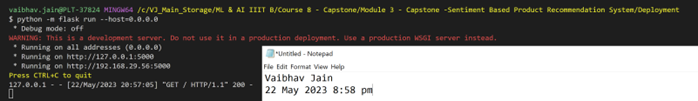

### Launch app in browser

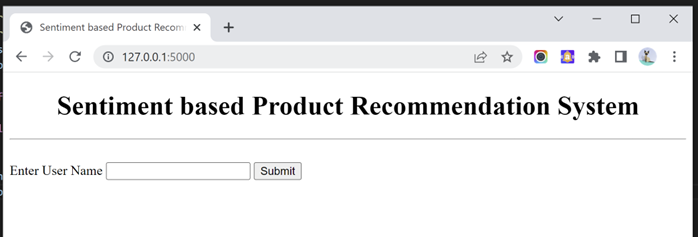

### Enter invalid User Name

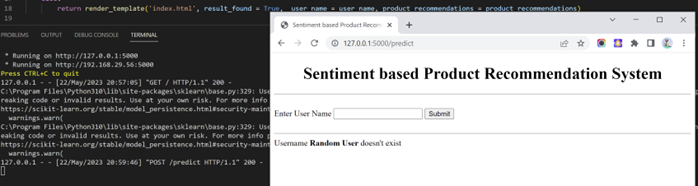

### Enter valid User Name

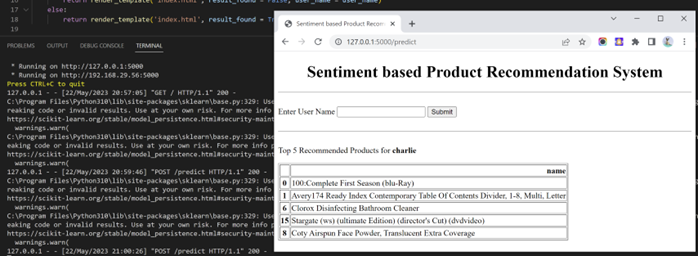

**Flask app is running locally. Heroku deployment (an optional task) is not done at this time.**

## Summary

**All mandatory tasks for sentiment based product recommendation system were performed**
- Selected XG Boost Tuned model as final sentiment analysis model.
- Selected User-User based recommendation system as recommendation model.
- Fine tuned both models together to achieve final Top 5 Product Recommentations.

----